# tasks.ipynb
# Ciaran Moran
# Student ID: G00426050
# Email: G00426050@atu.ie

This notebook is for Python tasks (1-4) for the ATU course *Applied Statistics*.

# TASK 1
# Lady Tasting Tea
# Based on code from
#  - Ian McLoughlin (Ian.McLoughlin@atu.ie)  
#  - Github: https://github.com/ianmcloughlin/2425_applied_statistics

In [84]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Normality
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
import scipy.stats as stats

# To plot the histogram
#  https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot
import matplotlib.pyplot as plt

## The Design of Experiments

> <img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" alt="Alt text" style="height:300px;float:right;">
> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup. We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.<br><br>
> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.<br><br>
> <i>The Design of Experiments By Ronald A. Fisher</i>

## Permutations and Combinations

### Permutations

A permutation is an ordering of its elements.

The set `{a, b, c}` has the permutations `abc`, `acb`, `bac`, `bca`, `cab`, and `cba`.


### Combinations

A combination is a selection of `k` elements from a set of size `n`.

In combinations, order does not matter and the same element cannot be selected twice.

The combinations of size 2 from the set `{a, b, c}` are `{a, b}`, `{a, c}`, and `{b, c}`.

## Cups of Tea

In [85]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

## math.comb(n, k)

https://docs.python.org/3/library/math.html#math.comb

Calculate the number of ways to choose **k** elements from a set of **n** elements where the order of the chosen elements does not matter and no element is selected more than once.


In [86]:
# Number of ways of selecting six cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

Label the twelve cups of tea `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9`, `10`, `11` and `12`.

We select six cups to have milk in first.

For example, we might select `2`, `4`, `5`, '6', '7' and `8`.

Visualize having six placeholders where we place six of the cup labels.

How many ways are there to select six cups from twelve?

Cups: `1 2 3 4 5 6 7 8 9 10 11 12`

Placeholders: `_ _ _ _ _ _`



In [87]:
# Total number of ways of selecting six cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show.
ways_ordered

665280

Note we don't care about order: if cups `2`, `4`, `5`, `6`, `7`,and `8` are selected in order it is the same result as if `2`, `8`, `4`, `5`, `6` and `7` were selected, or any other permutation.

`2 3 4 8 6 5`

`8 6 4 5 3 2`

`_ _ _ _ _ _`

In [88]:
# No of ways of shuffling six cups.
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles

720

In [89]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

924

## Formula

In mathematics, the `math.comb()` function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.


In [90]:
# Number of cups of tea in total.
n = 12

In [91]:
# Number of cups of tea with milk in first.
k = 6

## math.factorial

https://docs.python.org/3.12/library/math.html#math.factorial

Mathematically denoted as `n!`.

Multiply all positive integers from `n` down to 1.


`n! = n x (n - 1) x (n - 2) x ... x 1`

e.g. `5! = 5 x 4 x 3 x 2 x 1 = 120`

In [92]:
# Twelve factorial.
math.factorial(n)

479001600

In [93]:
# Six factorial.
math.factorial(k)

720

In [94]:
# Six factorial.
math.factorial(n - k)

720

In [95]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

924

```
n! = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1
k! = 6 x 5 x 4 x 3 x 2 x 1
(n - k)! = 6 x 5 x 4 x 3 x 2 x 1
n!/(n - k)! = (12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) / (6 x 5 x 4 x 3 x 2 x 1) = 12 x 11 x 10 x 9 x 8 x 7
```

#### Aside

In [96]:
# How many ways are there to shuffle a deck of 52 cards?
math.factorial(52)

80658175170943878571660636856403766975289505440883277824000000000000

## Ordering of Results

https://docs.python.org/3/library/itertools.html#itertools.combinations

In [97]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [98]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [99]:
# Number of combinations.
len(combs)

924

In [100]:
# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[3, 5, 8, 9, 10, 11]

In [101]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{3, 5, 8, 9, 10, 11}

In [102]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {3, 5} 2
(0, 1, 2, 3, 4, 6) {3} 1
(0, 1, 2, 3, 4, 7) {3} 1
(0, 1, 2, 3, 4, 8) {8, 3} 2
(0, 1, 2, 3, 4, 9) {9, 3} 2
(0, 1, 2, 3, 4, 10) {10, 3} 2
(0, 1, 2, 3, 4, 11) {11, 3} 2
(0, 1, 2, 3, 5, 6) {3, 5} 2
(0, 1, 2, 3, 5, 7) {3, 5} 2
(0, 1, 2, 3, 5, 8) {8, 3, 5} 3
(0, 1, 2, 3, 5, 9) {9, 3, 5} 3
(0, 1, 2, 3, 5, 10) {10, 3, 5} 3
(0, 1, 2, 3, 5, 11) {11, 3, 5} 3
(0, 1, 2, 3, 6, 7) {3} 1
(0, 1, 2, 3, 6, 8) {8, 3} 2
(0, 1, 2, 3, 6, 9) {9, 3} 2
(0, 1, 2, 3, 6, 10) {10, 3} 2
(0, 1, 2, 3, 6, 11) {11, 3} 2
(0, 1, 2, 3, 7, 8) {8, 3} 2
(0, 1, 2, 3, 7, 9) {9, 3} 2
(0, 1, 2, 3, 7, 10) {10, 3} 2
(0, 1, 2, 3, 7, 11) {11, 3} 2
(0, 1, 2, 3, 8, 9) {8, 9, 3} 3
(0, 1, 2, 3, 8, 10) {8, 10, 3} 3
(0, 1, 2, 3, 8, 11) {8, 11, 3} 3
(0, 1, 2, 3, 9, 10) {9, 10, 3} 3
(0, 1, 2, 3, 9, 11) {11, 9, 3} 3
(0, 1, 2, 3, 10, 11) {11, 10, 3} 3
(0, 1, 2, 4, 5, 6) {5} 1
(0, 1, 2, 4, 5, 7) {5} 1
(0, 1, 2, 4, 5, 8) {8, 5} 2
(0, 1, 2, 4, 5, 9) {9, 5} 2
(0, 1, 2, 4, 5, 10) {10, 5} 2
(0, 1, 2, 4, 5, 11) {11, 5} 2
(

In [103]:
# Show the overlaps.
print(no_overlaps)

[2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 2, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 

In [104]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

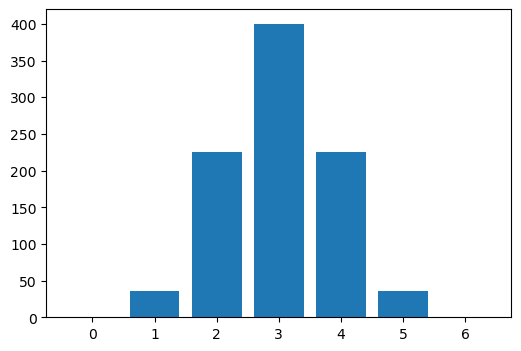

In [105]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

## The Null Hypothesis

- The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

- The lady is selecting the six cups from the twelve cups at random.

## Alternative Hypothesis

- The lady can tell the difference. 

### Evidence

Fisher: if the lady is just picking six cups at random, then it is unlikely she will pick the correct six. The probability is one in nine hundred and twenty four. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea. 

In [106]:
# The probability that she (randomly) selects the six correct cups.
1 / 924

0.0010822510822510823

In [107]:
# The probability that she (randomly) selects at least five correct cups.
# i.e. one error is made.
# 36 and 1 retrieved from the array above, which is...
# array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))
#print('1/70:' , 1/70)
#print('math.comb cals 5 from 6:' , 1 / math.comb(6,5))
#print('math.comb cals 4 from 6:' , 1 / math.comb(6,4))
#print('math.comb cals 3 from 6:' , 1 / math.comb(6,3))
#print('math.comb cals 5 from 12:' , 1 / math.comb(12,5))
(36 + 1) / 924

0.04004329004329004

In [108]:
# The probability that she (randomly) selects at least four correct cups.
# i.e. two errors are made.
# 36 and 1 retrieved from the array above, which is...
# array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))
print('math.comb cals :' , 1 / math.comb(12,4))
(36 + 1) / 924

math.comb cals : 0.00202020202020202


0.04004329004329004

## Type I Errors, Type II Errors, and Power

 - Type I and Type II errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types
 - Power: https://en.wikipedia.org/wiki/Power_(statistics)#Description

## End

# TASK 2: numpy's Normal Distribution

Task 2: numpy's Normal Distribution

In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.


In [109]:

# Generate a sample of one hundred thousand values using the function  
# with mean `10.0` and standard deviation `3.0`.

# Ref https://stackoverflow.com/questions/68321993/how-would-i-generate-100000-random-numbers-using-a-normal-distribution-with-a-sp
mean: float = 10.0
stdev: float = 3.0
n_samples: int = 100_000 # Ref https://stackoverflow.com/questions/49837534/what-do-1-000-and-100-000-mean

samples: np.ndarray = np.random.normal(loc=mean,
                                       scale=stdev,
                                       size=n_samples)

#print(samples)



# shapiro - test for normality
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html  
shapiro(x, *, axis=None, nan_policy='propagate', keepdims=False)  
Perform the Shapiro-Wilk test for normality.  
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.  

Parameters:  
x  
array_like  
Array of sample data. Must contain at least three observations.  

axis  
int or None, default: None  
If an int, the axis of the input along which to compute the statistic. The statistic of each axis-slice (e.g. row) of the  input will appear in a corresponding element of the output. If None, the input will be raveled before computing the  statistic.  

nan_policy  
{‘propagate’, ‘omit’, ‘raise’}  
Defines how to handle input NaNs.  

propagate:  
if a NaN is present in the axis slice (e.g. row) along which the statistic is computed, the corresponding entry  of the output will be NaN.  

omit:  
NaNs will be omitted when performing the calculation. If insufficient data remains in the axis slice along which the  statistic is computed, the corresponding entry of the output will be NaN.  

raise:  
if a NaN is present, a ValueError will be raised.

keepdims
bool, default: False
If this is set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the input array.

Returns:  
statistic
float
The test statistic.

p-value
float
The p-value for the hypothesis test.



### Shapiro-Wilk Test Explained
Referenced from  (https://builtin.com/data-science/shapiro-wilk-test)  
Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed.  
It evaluates data from a sample with the null hypothesis that the data set is normally distributed.  
A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t  
normally distributed.

https://www.statology.org/the-concise-guide-to-interpreting-p-values/  
Typically, researchers use a significance level of 0.05 as a cutoff for statistical significance.  
Here’s what it means in practice:  
  
If p < 0.05: This means that if the null hypothesis were true, we’d expect to see results  
as extreme as ours less than 5% of the time. In this case, we typically reject the null hypothesis  
and consider our results statistically significant. For our blood pressure example, we might conclude  
that there’s evidence the medication does have an effect on blood pressure.  
   
If p > 0.05: This means that if the null hypothesis were true, we’d expect to see results  
as extreme as ours more than 5% of the time. In this case, we fail to reject the null hypothesis  
and consider our results not statistically significant. For our example, we might conclude that we  
don’t have sufficient evidence to say the medication affects blood pressure.

In [110]:
# Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
# Explain the results and output.

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
# shapiro(x, *, axis=None, nan_policy='propagate', keepdims=False)
# Perform the Shapiro-Wilk test for normality.
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
res = stats.shapiro(samples)
res.statistic
print('statistic: ',res.statistic) # example output 0.9999668002128601
print('pvalue: ',res.pvalue)

statistic:  0.999984622001648
pvalue:  0.9830551147460938


Sample output:  
statistic:  0.9999709129333496  
pvalue:  0.6299029588699341  

Given the p-value is greater than the typical significance level (0.05), I do not reject the null hypothesis.  
This suggests that the sample likely comes from a normal distribution.

(array([2.3000e+01, 3.1900e+02, 2.8010e+03, 1.2665e+04, 2.7960e+04,
        3.1655e+04, 1.8360e+04, 5.4020e+03, 7.5700e+02, 5.8000e+01]),
 array([-3.232657  , -0.67828393,  1.87608913,  4.4304622 ,  6.98483527,
         9.53920833, 12.0935814 , 14.64795447, 17.20232753, 19.7567006 ,
        22.31107367]),
 <BarContainer object of 10 artists>)

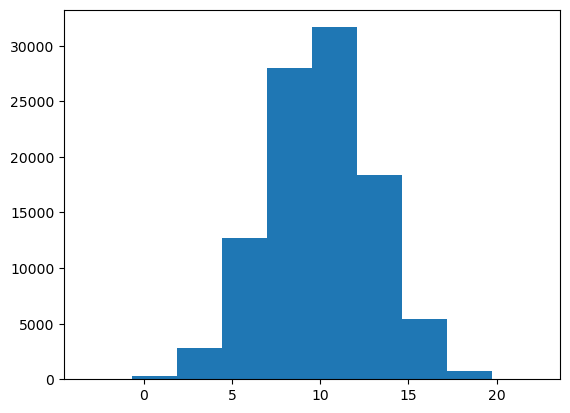

In [112]:
# Plot a histogram
plt.hist(samples)